In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### As a lifelong Pittsburgh Penguins fan and hockey player, I have always been fascinated by NHL statistics. When this project was first introduced, Sidney Crosby and the Penguins were still discussing a contract. My first idea was to try to use this data to predict how much Crosby would sign his new contract for. However, that time has passed, and Sid took 8.7 million a year, which is much less than he COULD get. This data set still has significance for me and the new scope of this project. This scope is to explore which statistic is the best indicator for how much an NHL player gets paid yearly. As you read the data, the salary is in millions (eg. Nikita Kucherov - salary = 9.5 = $9,500,000 yearly). For people who are not familiar with hockey's point system, there are goals, primary assists, and secondary assists. All three of these statistics count as a point, respectively. My desired audience is prospective NHL players who are curious as to how to earn the most money, so they should already know how points work.

In [7]:
# Looking at the top 5 players' statistics
df = pd.read_csv('skatersC.csv')
df.head()

,playerId,season,name,salary,team,position,gamesPlayed,primaryAssists,secondaryAssists,shotsOnGoal,points,goals,hits,shotsBlockedByPlayer
0,8476453,2023,Nikita Kucherov,9.50,TBL,R,81,62,38,306,144,44,45,35
1,8477492,2023,Nathan MacKinnon,12.60,COL,C,82,50,39,405,140,51,55,69
2,8478402,2023,Connor McDavid,12.50,EDM,C,76,62,38,263,132,32,118,39
3,8478550,2023,Artemi Panarin,11.64,NYR,L,82,37,34,303,120,49,18,15
4,8477956,2023,David Pastrnak,11.25,BOS,R,82,39,24,382,110,47,70,19


## Let's begin by first looking at a histogram of the average yearly salary. I must note, however, that these salaries are heavily skewed upwards. When I first downloaded the data set of these statistics, there was no salary statistic. I manually plugged in the salary of the top 275 players in the league, however, their are about 700 more players. If I had 12 hours of free time and an unlimited source of caffeine, then maybe I'd be able to get all 1,000 or so players' salaries in the dataset. For all intents and purposes, though, this data set works great as a predictor for the best of the best in the league.

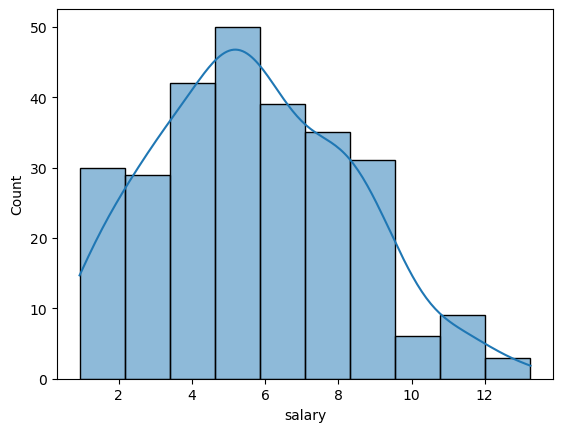

In [23]:
##Create histogram
sns.histplot(df.salary, kde=True)
plt.show()

* The median salary of this data is around 5 million.
* This data is skewed heavily upward, however, as the salary data is only from the top 275 players
* "Bubble" players, or players who float between the NHL and minor leagues, earn much less (I didn't have the time or patience to manually enter the salary of all 1,078 players)

## In the graph below, we can see the relationship between how many shots a player blocks and how many points they earn throughout the season. As a defenseman myself, I block a lot of shots, and don't get many points. This graph mirrors my personal experiences by showing that players who block more shots tend to earn less points.

<Axes: xlabel='points', ylabel='shotsBlockedByPlayer'>

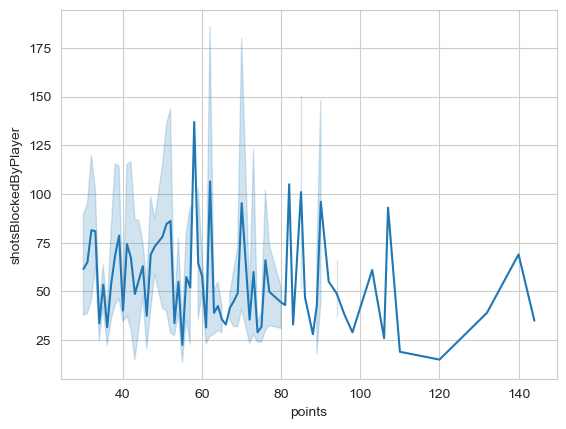

In [173]:
sns.lineplot(x=df.points, y=df.shotsBlockedByPlayer)

## The graph below makes it much easier to visualize why there are some people in the NHL who earn double and triple what other players make. As this graph shows, points are king in this league. The histogram at the top shows that points are skewed heavily right, with most players only scoring 40 to 50 points in a season. There are players who score 140 points in a season, though. These are the players who are earning over 10 million yearly. The scatterplot and its line of best fit clearly shows a positive correlation between points and salary.

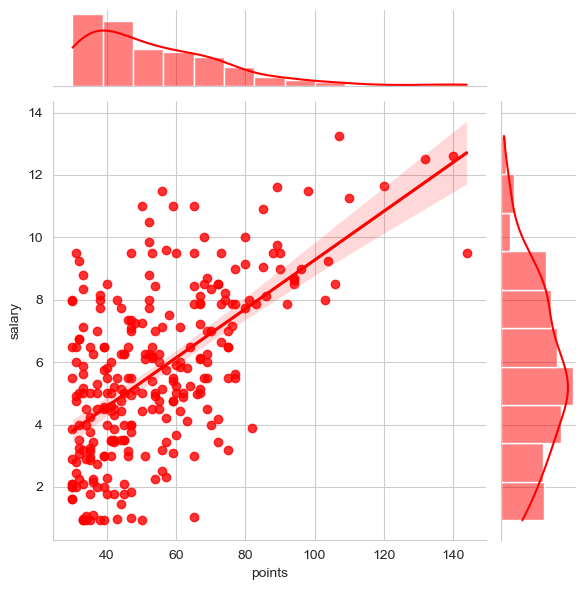

In [205]:
##Create a jointplot
sns.jointplot(data=df, x='points', y='salary', kind='reg', color='r')
plt.show()

* As the line of best fit shows, the more points a player earns, then the more money they will earn
* This is quite a loose correlation at the bottom left of the data set, but becomes stronger as points increase

<Axes: xlabel='points', ylabel='salary'>

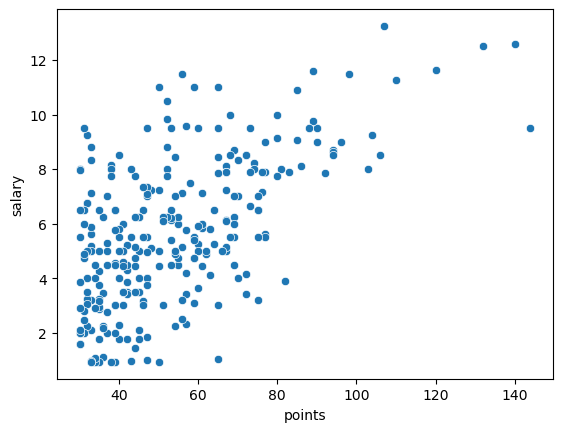

In [17]:
##Create a scatterplot
sns.scatterplot(x="points", y="salary", data=df)

* This scatterplot is the same as the one above.
* It's less tough on the eyes, and easier to see the correlation between points and salary.

## As Wayne Gretzky once said, "You miss 100% of the shots you don't take." This quote could not be more true while looking at the scatterplot below. It does not take a rocket scientist to figure out that, the more shots you take, the more goals you'll get; but I have never had a way to visualize this quote until now. As you can see, Auston Mathews, who ran away with the goal title last year with 69, took over 350 shots. This comes out to about 1 goal every 5.35 shots. Something that I find more impressive is that Sam Reinhart only took 233 shots, 136 less than Matthews, but still scored 57 goals. This comes out to 1 goal every 4.09 shots, making his shot to goal efficiency one of the best in the league. Even as a more "efficient" goal scorer, Reinhart still earns about 4 million less than Matthews every year.

<Axes: xlabel='goals', ylabel='shotsOnGoal'>

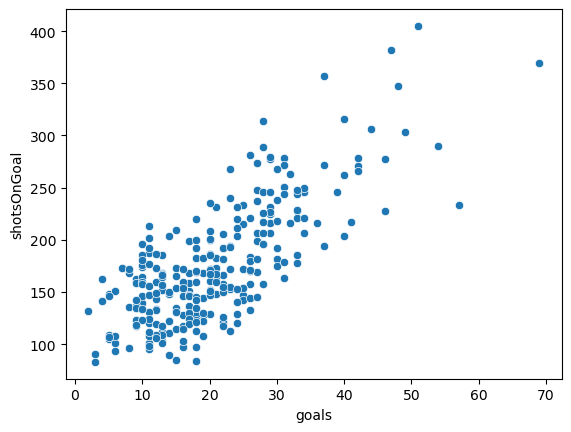

In [33]:
sns.scatterplot(x="goals", y="shotsOnGoal", data=df)

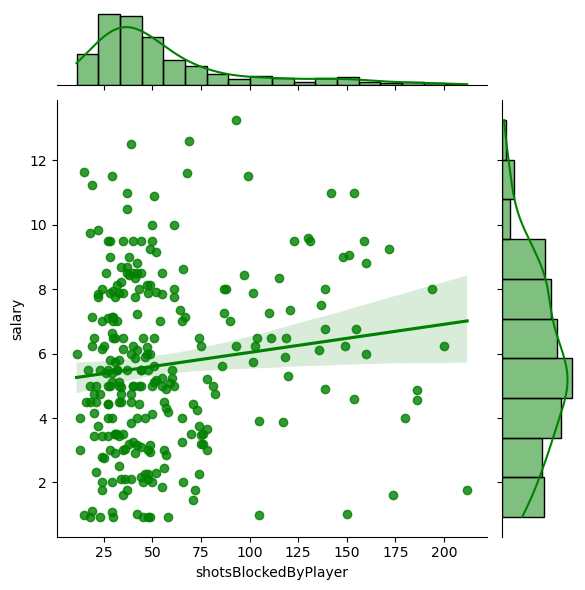

In [37]:
sns.jointplot(data=df, x='shotsBlockedByPlayer', y='salary', kind='reg', color='g')
plt.show()

* There is a slight positive correlation between shots blocked by a player and their salary
* Data is very, very loosely correlated.

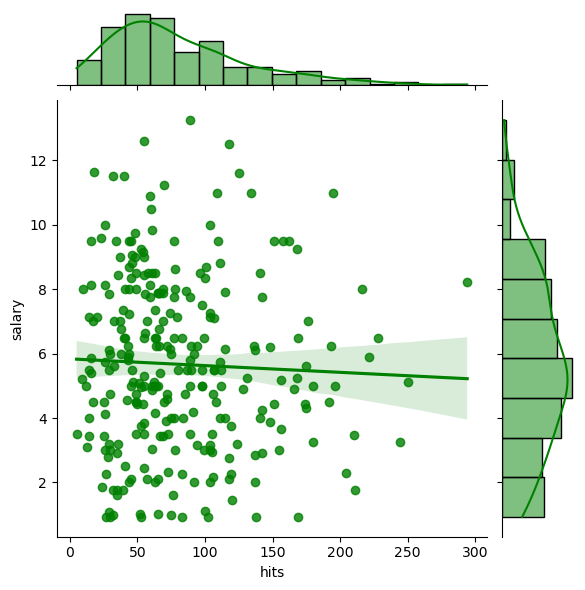

In [39]:
sns.jointplot(data=df, x='hits', y='salary', kind='reg', color='g')
plt.show()

* There is a slight negative correlation between hits by a player and their salary
* Players who make more money in the NHL hit less than the lower earners, but the data is very loosely correlated
* If there are any prospective NHL players viewing this project, just know if you hit less you will earn more money - but what's the point of hockey if you're not going to hit to other team.

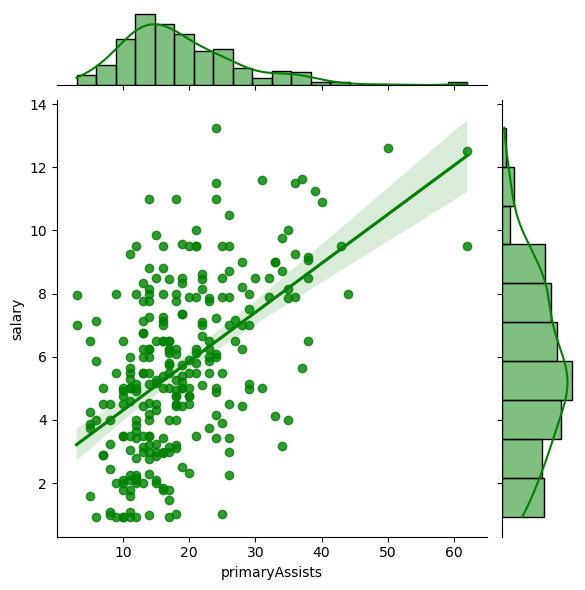

In [41]:
sns.jointplot(data=df, x='primaryAssists', y='salary', kind='reg', color='g')
plt.show()

* Primary assists and points go hand in hand, so it is no surprise that players who score more assists also earn more money.
* If you look at the top histogram, you can see that 2 players ran away with the primary assists title at 62.
* These players are Nikita Kucherov and Connor McDavid.
* You can see these two players at the right-most side of the scatterplot. McDavid earns 3 million more than Kucherov, though.

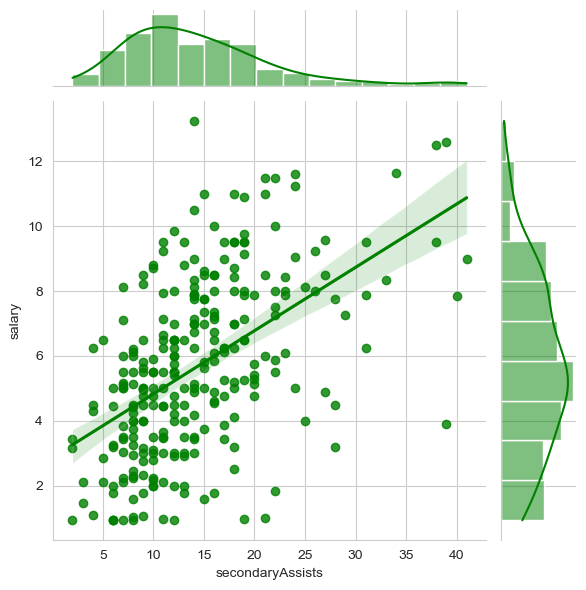

In [137]:
sns.jointplot(data=df, x='secondaryAssists', y='salary', kind='reg', color='g')
plt.show()

* Both primary and secondary assists have a positive correlation with a player's salary
* We can see this with goals as well
* When we combine secondary assists, primary assists, and goals, you get a player's points
* All 4 data sets, primary, secondary, goals, and points, correlate positively with a players salary
* POINTS ARE KING - when it comes to salary

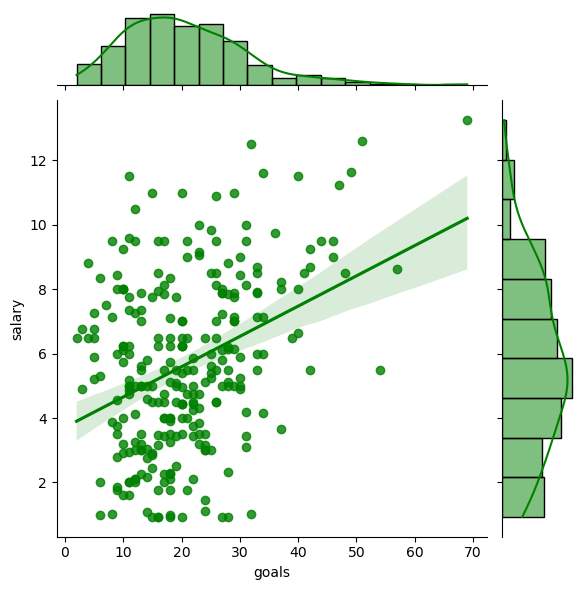

In [43]:
sns.jointplot(data=df, x='goals', y='salary', kind='reg', color='g')
plt.show()

In [187]:
df.head(10)

,playerId,season,name,salary,team,position,gamesPlayed,primaryAssists,secondaryAssists,shotsOnGoal,points,goals,hits,shotsBlockedByPlayer
0,8476453,2023,Nikita Kucherov,9.50,TBL,R,81,62,38,306,144,44,45,35
1,8477492,2023,Nathan MacKinnon,12.60,COL,C,82,50,39,405,140,51,55,69
2,8478402,2023,Connor McDavid,12.50,EDM,C,76,62,38,263,132,32,118,39
3,8478550,2023,Artemi Panarin,11.64,NYR,L,82,37,34,303,120,49,18,15
4,8477956,2023,David Pastrnak,11.25,BOS,R,82,39,24,382,110,47,70,19
5,8479318,2023,Auston Matthews,13.25,TOR,C,81,24,14,369,107,69,89,93
6,8477934,2023,Leon Draisaitl,8.50,EDM,C,81,38,27,217,106,41,58,26
7,8478420,2023,Mikko Rantanen,9.25,COL,R,80,36,26,271,104,42,53,49
8,8476468,2023,J.T. Miller,8.00,VAN,C,81,44,22,194,103,37,216,61
9,8477939,2023,William Nylander,11.50,TOR,R,82,36,22,316,98,40,32,29


## Let's move on to a more focused look at NHL salaries. As mentioned before, the average salary of the top 275 players is around 5 million. Sidney Crosby lies right at 8.7m. However, as I mentioned in the introduction, he could be earning at least 10 million with the output he produces year after year. The three people you see earning the most are Connor McDavid at 12.5m, Nathan MacKinnon at 12.6m, and finally Auston Matthews at 13.25m. It is no surprise, then, that these players finished 3rd, 2nd, and 6th in points in the 2023-2024 season, respectively.

<Axes: >

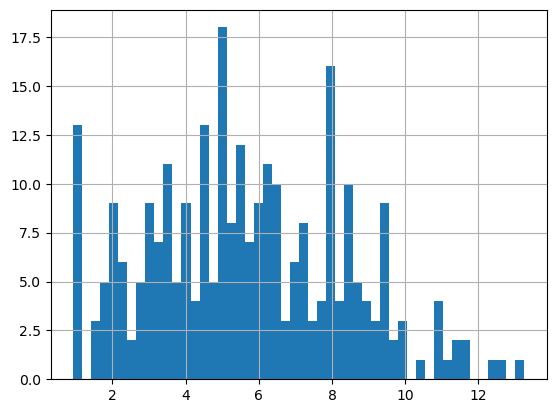

In [61]:
df["salary"].hist(bins=50)


<Axes: >

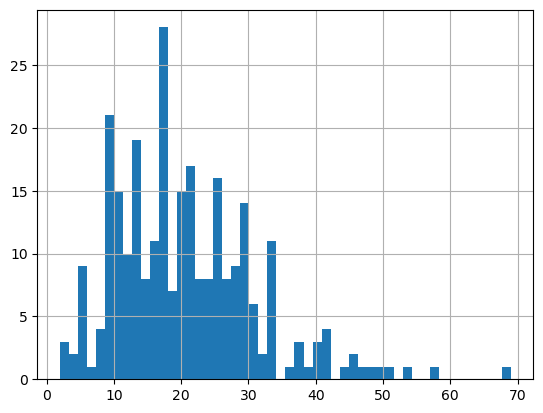

In [63]:
df["goals"].hist(bins=50)


* Auston Matthews ran away with the goal title last year, being the only player to score more than 60 goals.

## Once again, through my own bias, I like to think that shots blocked is a great indicator for how much a player $should$ earn. However, that is not how a hockey team is run. If we look at the graph below, there is a massive cluster between 25 and 50 shots blocked, showing that most players are not willing to put their body on the line to save a shot on net. I have a magnitude of respect for the players who are blocking 100+ shots in a season, but unfortunately this statistic has very little correlation with how much a player is paid yearly.

<Axes: >

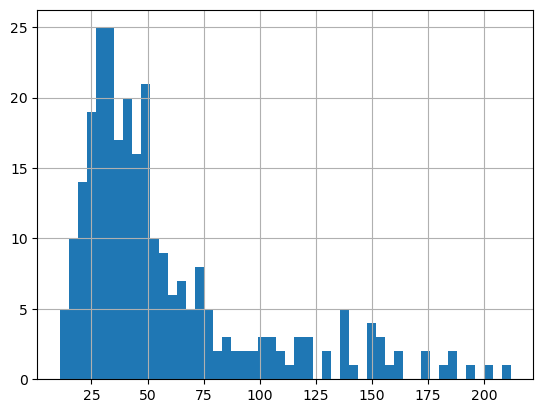

In [65]:
df["shotsBlockedByPlayer"].hist(bins=50)

<Axes: >

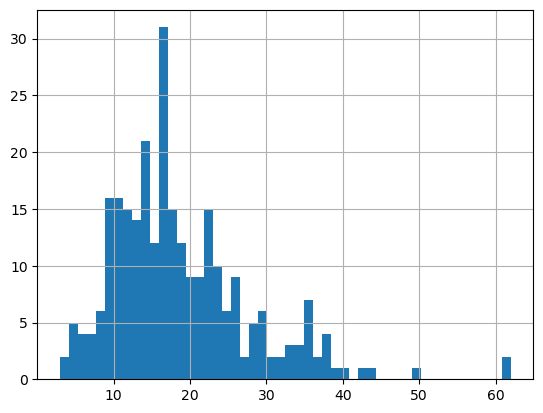

In [67]:
df["primaryAssists"].hist(bins=50)

* Nikita Kucherov and Connor McDavid both finished with 62 assists (x axis)
* McDavid accomplished this feat while playing 5 less games than Kucherov

## As the box and whisker graph shows below, there were 5 outliers for goals scored in last year's NHL season. These 5 outliers are Auston Matthews with 69, Sam Reinhart with 57, Zach Hyman with 54, Nathan MacKinnon with 51, and Artemi Panarin with 49. Sidney Crosby was just 7 goals off being an outlier with 42 on the season.

<Axes: >

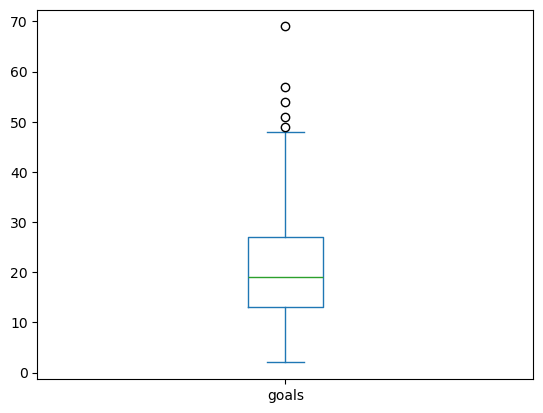

In [71]:
df["goals"].plot.box()

## Similarly to the goals box and whisker plot, there are 5 outliers for points in the 2023-2024 NHL season. At the top is Nikita Kucherov with 144 points. Next is Nathan MacKinnon with 140 points. In third is Connor McDavid with 132 points. Fourth is Artemi Panarin with 120 points. The last outlier is David Pastrnak with 110 points. Once again, Sidney Crosby came in close at 94 points. Even though Sam Reinhart and Zach Hyman scored an outlier's amount of goals last season, they are not even in the top 10 for total points. This further proves the point that POINTS are the king statistic, not just goals.

<Axes: >

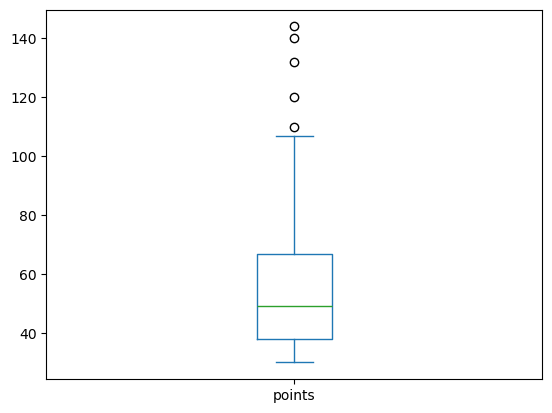

In [73]:
df["points"].plot.box()

In [193]:
df.head(15)

,playerId,season,name,salary,team,position,gamesPlayed,primaryAssists,secondaryAssists,shotsOnGoal,points,goals,hits,shotsBlockedByPlayer
0,8476453,2023,Nikita Kucherov,9.50,TBL,R,81,62,38,306,144,44,45,35
1,8477492,2023,Nathan MacKinnon,12.60,COL,C,82,50,39,405,140,51,55,69
2,8478402,2023,Connor McDavid,12.50,EDM,C,76,62,38,263,132,32,118,39
3,8478550,2023,Artemi Panarin,11.64,NYR,L,82,37,34,303,120,49,18,15
4,8477956,2023,David Pastrnak,11.25,BOS,R,82,39,24,382,110,47,70,19
5,8479318,2023,Auston Matthews,13.25,TOR,C,81,24,14,369,107,69,89,93
6,8477934,2023,Leon Draisaitl,8.50,EDM,C,81,38,27,217,106,41,58,26
7,8478420,2023,Mikko Rantanen,9.25,COL,R,80,36,26,271,104,42,53,49
8,8476468,2023,J.T. Miller,8.00,VAN,C,81,44,22,194,103,37,216,61
9,8477939,2023,William Nylander,11.50,TOR,R,82,36,22,316,98,40,32,29


** The 5 outliers for points are:
* Nikita Kucherov - 144 points
* Nathan MacKinnon - 140 points
* Connor McDavid - 132 points
* Artemi Panarin - 120 points
* David Pastrnak - 110 points

* Nikita Kucherov, being the leader in points, gets paid the least out of these 5 outliers

<Axes: >

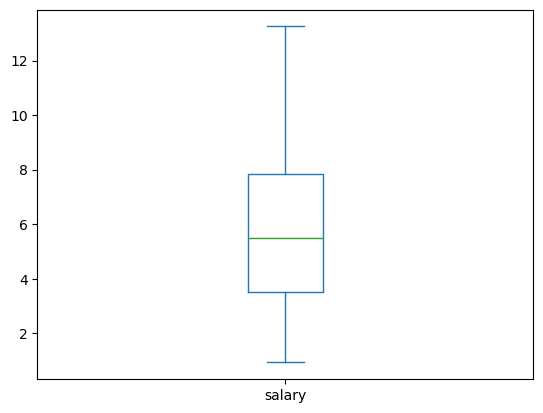

In [75]:
df["salary"].plot.box()

## Below are the comparisons of the stats goals, salary, points, hits, and shots blocked by a player. Let's move down this list 1 by 1. Goals vs. Salary does have a positive correlation, but it's loose at best. Next, Goals vs. Points has a strong correlation, but they go hand in hand so there is no surprise. Next is Goals vs. Hits. There is really no correlation with this, and it is not helpful to the overall narrative. Next is Goals vs. Shots blocked by a player. This graph is interesting because it follows a negative curve. The more and more a player scores, the less and less likely they are to put their body in front of the puck. Next is Salary vs. Points. This is where we see where the money is REALLY earned. Hits and blocked shots do not matter to NHL general managers. They are worried about how many goals a player can contribute to instead of the more gritty statistics. Salary vs. Hits shows no correlation, further proving the point that teams will not shell out big bucks just because you are willing to hit. Looking at Salary vs. Shots blocked, there is once again little to no correlation. However, I have much respect for the players who are earning 10 million and still blocking 150 shots. Points vs. Hits shows a slightly negative correlation, as mentioned above. Points vs. Shots blocked also shows a negative correlation. The more goals you contribute to for your team, the less likely you are to try to stop the other team from scoring. Hits vs. Shots blocked can be ignored, since as we touched on above, these general managers do not care about the gritty stats within the game of hockey.

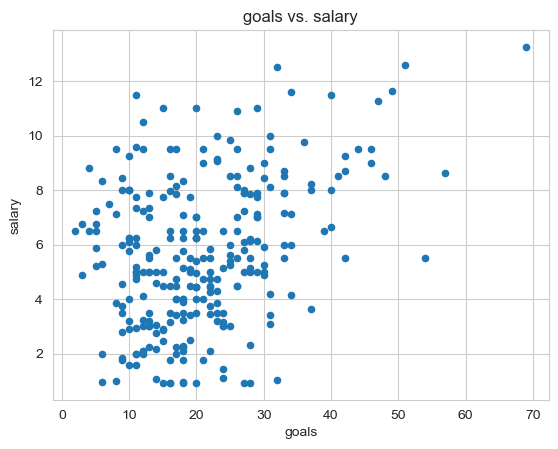

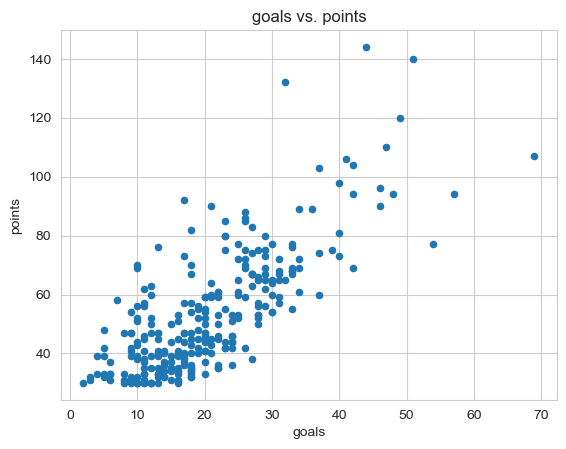

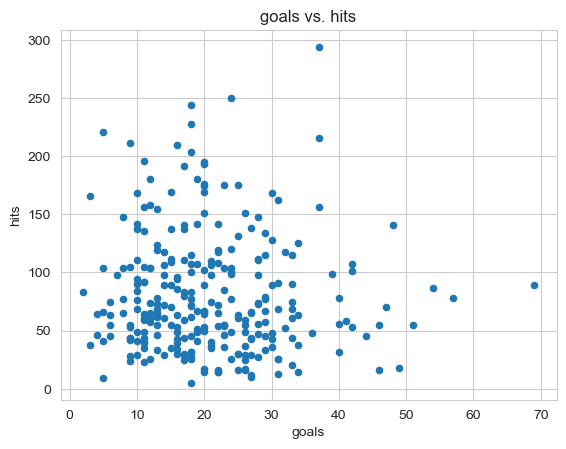

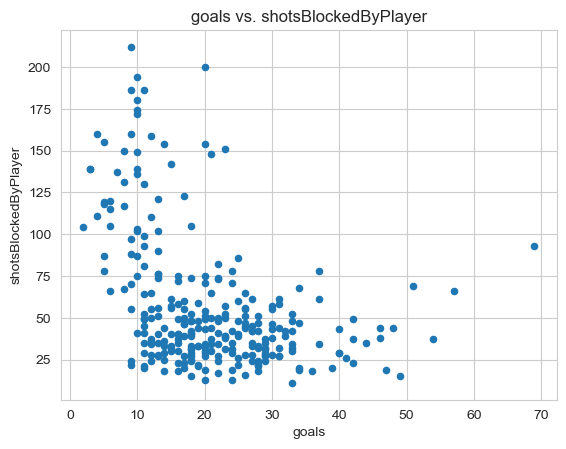

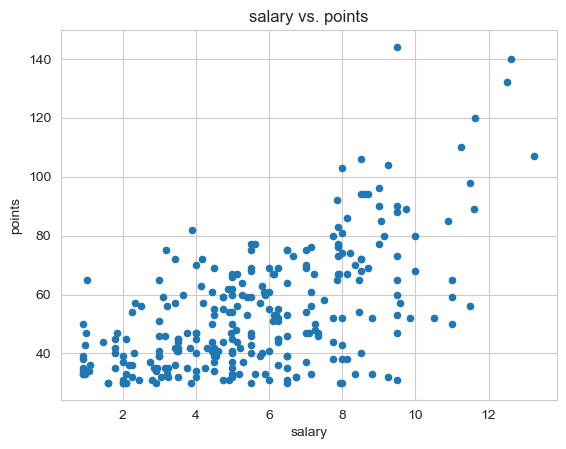

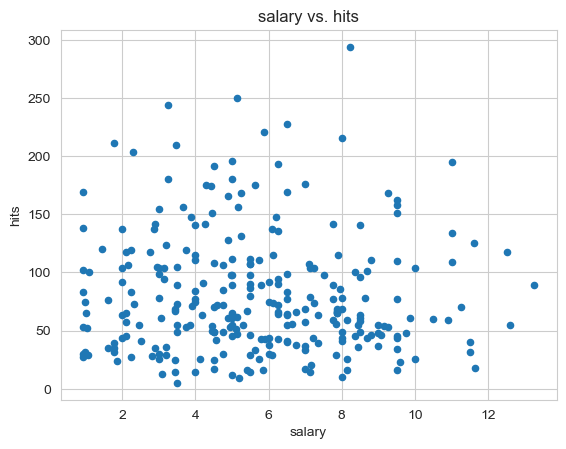

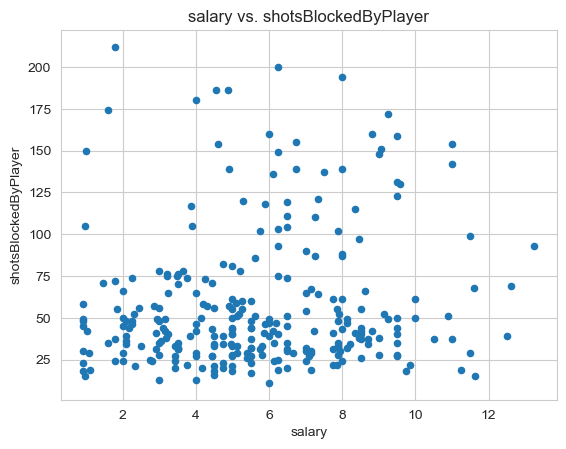

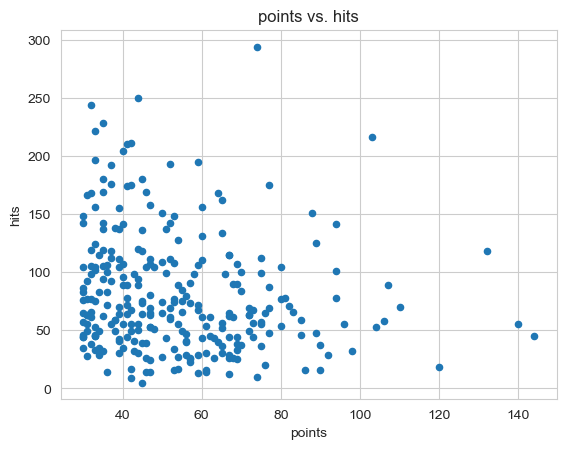

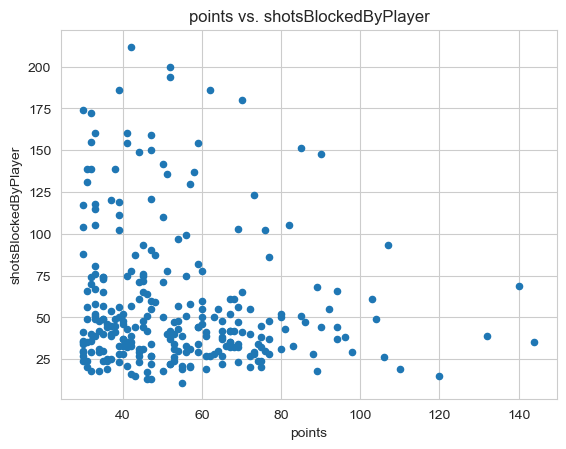

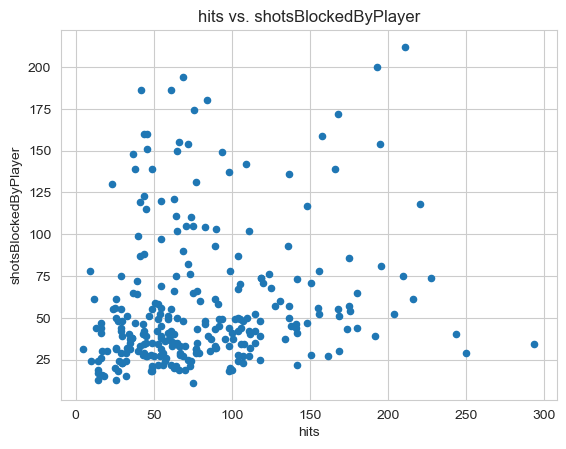

In [153]:
from itertools import combinations 

comb = combinations(['goals', 'salary', 'points', 'hits', 'shotsBlockedByPlayer'], 2) 

for i in list(comb): 
    df.plot(kind='scatter', x=list(i)[0], y=list(i)[1], title=list(i)[0] + " vs. " + list(i)[1])

# You have already seen the graph below, however the different visual helps us discern the outliers a bit better. The darker spots are what we can EXPECT a player to get paid in relation to their points. For example, in the bottom left corner, the darkest spot is at around 30 points and 750,000 yearly. In the middle, we can see a darker green spot around 8 million and 75 points. This helps us see that, if the an NHL player is putting up 75 points consistently, then they should come to expect at least 8 million in return. The players who are less common are the lighter hexagons. The players in the top right corner of the graph are barely visible. They show us that their statistics are few and far between and these players are one of one.

<Axes: xlabel='points', ylabel='salary'>

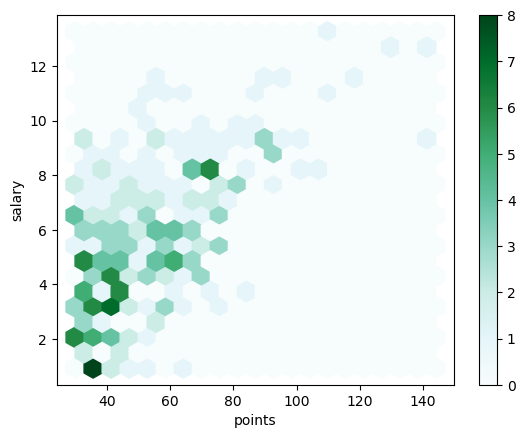

In [87]:
df.plot.hexbin(x='points', y='salary', gridsize=20)

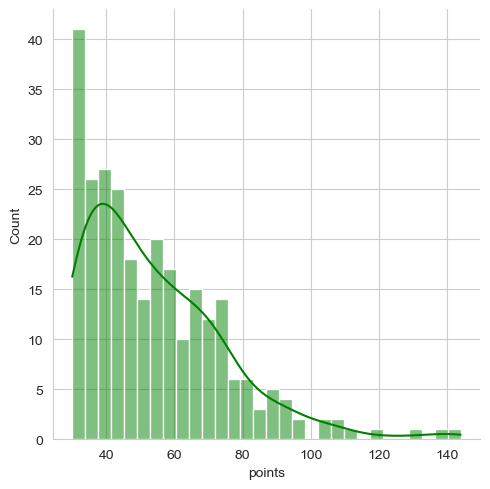

In [99]:
sns.displot(df['points'].dropna(), kde=True, bins=30, color='Green')


* Points are hard to come by in the NHL
* This graph skews right, with a heavy cluster from 20 to 60 points

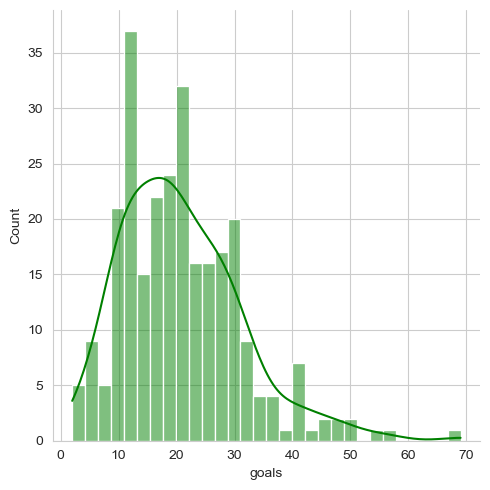

In [101]:
sns.displot(df['goals'].dropna(), kde=True, bins=30, color='Green')

* The league average for goals peaks around 15 to 17, making it even more impressive that players are scoring 50 to 60 goals in a season

In [149]:
df.head(25)

,playerId,season,name,salary,team,position,gamesPlayed,primaryAssists,secondaryAssists,shotsOnGoal,points,goals,hits,shotsBlockedByPlayer
0,8476453,2023,Nikita Kucherov,9.50,TBL,R,81,62,38,306,144,44,45,35
1,8477492,2023,Nathan MacKinnon,12.60,COL,C,82,50,39,405,140,51,55,69
2,8478402,2023,Connor McDavid,12.50,EDM,C,76,62,38,263,132,32,118,39
3,8478550,2023,Artemi Panarin,11.64,NYR,L,82,37,34,303,120,49,18,15
4,8477956,2023,David Pastrnak,11.25,BOS,R,82,39,24,382,110,47,70,19
5,8479318,2023,Auston Matthews,13.25,TOR,C,81,24,14,369,107,69,89,93
6,8477934,2023,Leon Draisaitl,8.50,EDM,C,81,38,27,217,106,41,58,26
7,8478420,2023,Mikko Rantanen,9.25,COL,R,80,36,26,271,104,42,53,49
8,8476468,2023,J.T. Miller,8.00,VAN,C,81,44,22,194,103,37,216,61
9,8477939,2023,William Nylander,11.50,TOR,R,82,36,22,316,98,40,32,29


## Now that we have established which statistic is the most important when it comes to salary negotitations (total points), we can now talk about Sydney Crosby and his devotion to the Penguins and the city of Pittsburgh. If we look at where Sid is on this graph, he is in the upper-middle half of the graph, at 94 points while earning 8.7 million yearly. If we look at some of the hexagons above Sid, we can see that there are a number of players earning just as much or more as he is, yet producing less points. Sidney Crosby finished the 2023-2024 season with 94 points, putting him at top 12 for points. His contract does not reflect these statistics, though. There are 43 players in the NHL getting paid more than he is. This data shows that Sidney Crosby does not care (a lot) about the salary. Instead, being the competitor he is, he is willing to take a pay cut to allow other star players to be paid what they deserve on the Penguins. For example, Erik Karlsson, a star defenseman for the Penguins, is making 11.5 million a year. While this salary is well deserved (Karlsson won the Norris trophy the year before the Penguins aquired him , which is awarded to the best defenseman in the league that year), Crosby's resume could have earned him at least 11.5 million a year. This year's Norris trophy winner, Quinn Hughes, scored 92 points. He only earns 7.85 million per year, as seen in the data table above, but this contract is subject to increase in 2026 when he is set to renegotiate a contract.

<Axes: xlabel='points', ylabel='salary'>

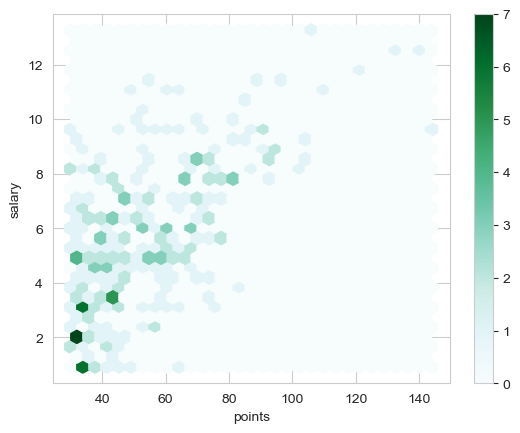

In [215]:
df.plot.hexbin(x='points', y='salary', gridsize=30)

##      In conclusion, I can confidently say that points are by far the biggest indicator for how much a player will earn on a yearly basis. As we touched on a lot in the data above, the "gritty" stats like hits and shots blocked are terrible indicators to predict how much a player will make. As we saw with hits, there are even certain statistics that could lose a player money. The data shows that the average salary is about 5 million, but as I said earlier this statistic is skewed since I could not possibly enter every player's salary manually. The actual league average is 3.5 million a year, and the minimum salary is $750,000. 

## From this data, it is clear to see that points are king when it comes to negotiating a contract. That is not to say that there are not certain players who barely break the 50 point barrier and are still being paid 10 million a year. These players must have the best agents in the game, or they had monster seasons in years before. If I were to explore this project even more, I think it would be interesting to look at the stats of these players for 10 seasons or even more. The data sets may become better correlated since more data usually yields a tighter correlation. 

## The thing that impresses me the most is looking at the outliers for points and goals. While many casual fans may solely focus their opinions about a player's skill to how many goals they score, the data shows that primary and secondary assists are just as important when it comes to deciding how much to pay a player. One of the failed visual products was that of the bubble plot, which was quite hard to read. The bubbles were small, and the stats conveyed there could be visualized in multiple scatterplots back to back. I do not believe there are any other stories that this one would occlude, marginalize, or minimize. The thing I liked best about this project was the fact that I could finally visualize statistics and see much clearer what makes the elite players elite. I enjoyed working with the different code and finding graphs that could best convey the information I wished to communicate. 

## Fianlly, I will mention Wayne Gretzky again. After playing with the Oilers for 9 years, he moved to the LA Kings where they paid him 8.5 million yearly, in 1988! With a simple inflation calculator, this 8.5 million would be worth around 22.6 million today. If Crosby were to move from the Penguins to another team, there is a great chance that he would be paid nearly double of what he is making as a Penguin. However, as I mentioned above, Crosby loves the city of Pittsburgh and wants to win with the team he came into the league with. Gretzky's salary was well earned, though, since he has the most points in NHL history. If we learned anything from this data, we know that Gretzky deserved the money he was given since POINTS ARE KING!

# Works Cited
* BetMGM. “NHL Salaries: How Much Do Players Make?” BetMGM, 12 Oct. 2023, sports.betmgm.com/en/blog/nhl/nhl-salaries-how-much-players-make-bm11/#:~:text=The%20average%20NHL%20salary%20is.
  
* “Gretzky Tops in Salary with New Deal.” Vt.edu, 22 Sept. 1993, scholar.lib.vt.edu/VA-news/ROA-Times/issues/1993/rt9309/930922/09220190.htm#:~:text=Wayne%20Gretzky%20has%20agreed%20to. Accessed 19 Sept. 2024.
  
* Spotrac. “2024 NHL Salary Rankings.” Spotrac.com, www.spotrac.com/nhl/rankings/player/_/year/2024/sort/contract_average.
  
* Tanner, Peter. “MoneyPuck.com -Download Datasets.” Moneypuck.com, moneypuck.com/data.htm. Accessed 19 Sept. 2024.